<a href="https://colab.research.google.com/github/QuanShi-226/Feature-Selection/blob/main/A2_QuanShi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()

# Create a DataFrame
X = pd.DataFrame(data.data, columns=data.feature_names)

# Create a Series
y = pd.Series(data.target)

# Display
display(X.head())
display(y.head())


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,0
0,0
1,0
2,0
3,0
4,0


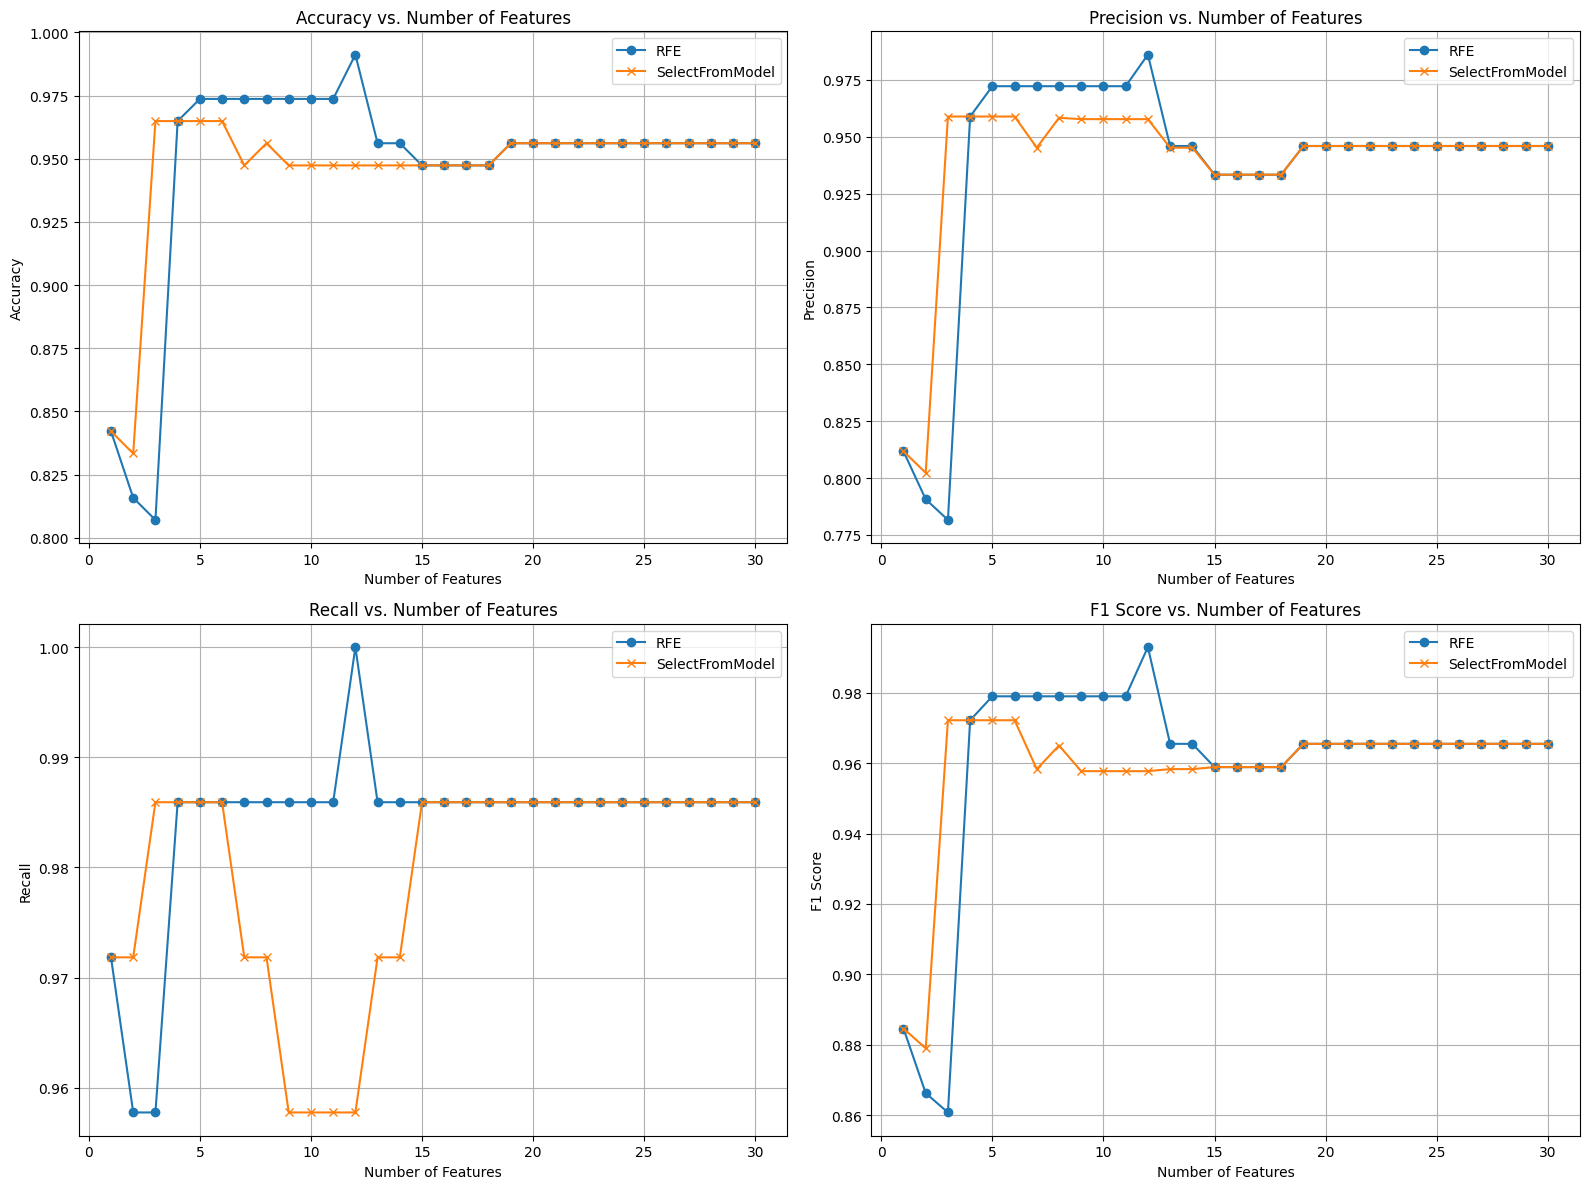

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Add target column

# Split the dataset into features (X) and target (y)
X = df.drop(columns='target')
y = df['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up Logistic Regression as the baseline model
baseline_model = LogisticRegression(max_iter=10000, random_state=42)

# Initialize lists to store metrics for RFE and SelectFromModel
rfe_accuracies, rfe_precisions, rfe_recalls, rfe_f1_scores = [], [], [], []
sfm_accuracies, sfm_precisions, sfm_recalls, sfm_f1_scores = [], [], [], []
n_features = list(range(1, X.shape[1] + 1))  # List of feature counts to test

# 1. Using RFE (Recursive Feature Elimination) to reduce features and record model performance
for n in n_features:
    rfe = RFE(baseline_model, n_features_to_select=n)
    rfe.fit(X_train, y_train)
    X_train_rfe = rfe.transform(X_train)
    X_test_rfe = rfe.transform(X_test)

    # Train and predict with the reduced features
    baseline_model.fit(X_train_rfe, y_train)
    y_pred_rfe = baseline_model.predict(X_test_rfe)

    # Record performance metrics
    rfe_accuracies.append(accuracy_score(y_test, y_pred_rfe))
    rfe_precisions.append(precision_score(y_test, y_pred_rfe))
    rfe_recalls.append(recall_score(y_test, y_pred_rfe))
    rfe_f1_scores.append(f1_score(y_test, y_pred_rfe))

# 2. Using SelectFromModel to reduce features based on model coefficients
sfm_model = LogisticRegression(max_iter=10000, random_state=42)
sfm_model.fit(X_train, y_train)
sfm_importances = np.abs(sfm_model.coef_).flatten()
sorted_indices = np.argsort(sfm_importances)[::-1]

# Select top features and record model performance
for n in n_features:
    selected_features = sorted_indices[:n]
    X_train_sfm = X_train.iloc[:, selected_features]
    X_test_sfm = X_test.iloc[:, selected_features]

    # Train and predict with selected features
    baseline_model.fit(X_train_sfm, y_train)
    y_pred_sfm = baseline_model.predict(X_test_sfm)

    # Record performance metrics
    sfm_accuracies.append(accuracy_score(y_test, y_pred_sfm))
    sfm_precisions.append(precision_score(y_test, y_pred_sfm))
    sfm_recalls.append(recall_score(y_test, y_pred_sfm))
    sfm_f1_scores.append(f1_score(y_test, y_pred_sfm))

# Plot performance metrics for RFE and SelectFromModel
metrics = {
    "Accuracy": (rfe_accuracies, sfm_accuracies),
    "Precision": (rfe_precisions, sfm_precisions),
    "Recall": (rfe_recalls, sfm_recalls),
    "F1 Score": (rfe_f1_scores, sfm_f1_scores)
}

plt.figure(figsize=(16, 12))
for i, (metric_name, (rfe_values, sfm_values)) in enumerate(metrics.items(), 1):
    plt.subplot(2, 2, i)
    plt.plot(n_features, rfe_values, label="RFE", marker='o')
    plt.plot(n_features, sfm_values, label="SelectFromModel", marker='x')
    plt.xlabel("Number of Features")
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} vs. Number of Features")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Add target column

# Split the dataset into features (X) and target (y)
X = df.drop(columns='target')
y = df['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use RFECV to automatically select the optimal number of features
model = LogisticRegression(max_iter=10000, random_state=42)
rfecv = RFECV(estimator=model, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

# Output the number of selected features and their names
print("RFECV optimal number of features:", rfecv.n_features_)
print("RFECV selected features:", X.columns[rfecv.support_])

# Transform the test data using the selected features and predict with the baseline model
X_test_rfe = rfecv.transform(X_test)
model.fit(rfecv.transform(X_train), y_train)
y_pred_rfe = model.predict(X_test_rfe)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_rfe)
precision = precision_score(y_test, y_pred_rfe)
recall = recall_score(y_test, y_pred_rfe)
f1 = f1_score(y_test, y_pred_rfe)

# Display the model's performance
print("RFECV Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


RFECV optimal number of features: 29
RFECV selected features: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'],
      dtype='object')
RFECV Model Performance:
Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465
F1 Score: 0.9655172413793104


In [ ]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Add target column

# Split the dataset into features (X) and target (y)
X = df.drop(columns='target')
y = df['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SelectFromModel to automatically select important features
model = LogisticRegression(max_iter=10000, random_state=42)
sfm = SelectFromModel(estimator=model, threshold="mean")
sfm.fit(X_train, y_train)

# Output the names of the selected features
selected_features = X.columns[sfm.get_support()]
print("SelectFromModel selected features:", selected_features)

# Transform the training and test sets to include only the selected features
X_train_sfm = sfm.transform(X_train)
X_test_sfm = sfm.transform(X_test)

# Retrain the model with the selected features and predict on the test set
model.fit(X_train_sfm, y_train)
y_pred_sfm = model.predict(X_test_sfm)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_sfm)
precision = precision_score(y_test, y_pred_sfm)
recall = recall_score(y_test, y_pred_sfm)
f1 = f1_score(y_test, y_pred_sfm)

# Display the model's performance
print("SelectFromModel Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


SelectFromModel selected features: Index(['mean radius', 'mean perimeter', 'mean concavity', 'texture error',
       'worst texture', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry'],
      dtype='object')
SelectFromModel Model Performance:
Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
F1 Score: 0.9577464788732394


Step 2

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the population with binary chromosome representation for feature selection
def initilization_of_population(size, n_feat):
    return np.random.randint(2, size=(size, n_feat))

# Fitness score calculation: combines model accuracy and feature count penalty
def fitness_score(population, X_train, X_test, Y_train, Y_test, penalty=0.1):
    scores = []
    for individual in population:
        selected_features = X_train.iloc[:, individual.astype(bool)]  # Select features

        if selected_features.shape[1] == 0:  # If no features selected, score 0
            scores.append(0)
            continue

        model = LogisticRegression(solver='liblinear')
        model.fit(selected_features, Y_train)
        predictions = model.predict(X_test.iloc[:, individual.astype(bool)])
        accuracy = accuracy_score(Y_test, predictions)

        # Fitness score with penalty for number of features used
        score = accuracy - penalty * selected_features.shape[1] / X_train.shape[1]
        scores.append(score)

    scores = np.array(scores)
    sorted_indices = np.argsort(scores)[::-1]  # Sort in descending order
    return scores[sorted_indices], population[sorted_indices]

# Tournament selection for choosing parents
def tournament_selection(population, scores, n_parents, tournament_size=3):
    selected_parents = []
    for _ in range(n_parents):
        tournament_indices = np.random.choice(len(population), tournament_size, replace=False)
        tournament_scores = scores[tournament_indices]
        winner_index = tournament_indices[np.argmax(tournament_scores)]
        selected_parents.append(population[winner_index])
    return np.array(selected_parents)

# Crossover operation for genetic algorithm
def crossover(parents, crossover_rate=0.8):
    offspring = []
    n_parents = parents.shape[0]
    for i in range(0, n_parents, 2):
        parent1 = parents[i]
        parent2 = parents[(i + 1) % n_parents]

        # Perform crossover with a certain probability
        if np.random.rand() < crossover_rate:
            crossover_point = np.random.randint(1, len(parent1))
            child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
        else:
            child1, child2 = parent1, parent2

        offspring.append(child1)
        offspring.append(child2)

    return np.array(offspring)

# Mutation operation for genetic algorithm
def mutation(offspring, mutation_rate, n_feat):
    mutation_matrix = np.random.rand(offspring.shape[0], n_feat) < mutation_rate
    return np.where(mutation_matrix, 1 - offspring, offspring)

# Main function for running the genetic algorithm
def generations(X, y, size, n_feat, n_parents, mutation_rate, n_gen, penalty, crossover_rate, tournament_size, X_train, X_test, Y_train, Y_test):
    best_chromo = []
    best_score = []

    population_nextgen = initilization_of_population(size, n_feat)  # Initialize population

    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen, X_train, X_test, Y_train, Y_test, penalty)

        print(f'Best score in generation {i + 1}: {scores[0]}')

        # Elitism - retain the best individual
        elite = pop_after_fit[0]

        # Select parents using tournament selection
        selected_parents = tournament_selection(pop_after_fit, scores, n_parents, tournament_size)

        # Perform crossover
        offspring = crossover(selected_parents, crossover_rate)

        # Apply mutation
        offspring = mutation(offspring, mutation_rate, n_feat)

        # Add the elite individual to the next generation
        population_nextgen = np.vstack((elite, offspring))

        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])

    return best_chromo, best_score

# Genetic algorithm parameters
population_size = 20
num_features = X.shape[1]
num_parents = 10
mutation_rate = 0.01
num_generations = 10
penalty = 0.1
crossover_rate = 0.8
tournament_size = 3

# Run the genetic algorithm
best_chromosomes, best_scores = generations(X, y, population_size, num_features, num_parents, mutation_rate, num_generations, penalty, crossover_rate, tournament_size, X_train, X_test, Y_train, Y_test)

# Print final results
print("Best Chromosomes over generations:", best_chromosomes)
print("Best Scores over generations:", best_scores)

# Display selected features in the best solution
best_solution = best_chromosomes[-1]
selected_features = X.columns[best_solution.astype(bool)]
print("Selected features in the best solution:", selected_features)


Best score in generation 1: 0.9457894736842105
Best score in generation 2: 0.9457894736842105
Best score in generation 3: 0.9491228070175438
Best score in generation 4: 0.9524561403508771
Best score in generation 5: 0.9557894736842105
Best score in generation 6: 0.9557894736842105
Best score in generation 7: 0.9591228070175438
Best score in generation 8: 0.9591228070175438
Best score in generation 9: 0.9591228070175438
Best score in generation 10: 0.9591228070175438
Best Chromosomes over generations: [array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0]), array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0]), array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1]), array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0]), array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,